In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

/home/admyyh/miniconda3/envs/ultralytics/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100, output_channels=1):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.output_channels = output_channels
        
        self.model = nn.Sequential(
            # Input: latent_dim
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 784 * output_channels),
            nn.Tanh()
        )
    
    def forward(self, z):
        # Generate fake images
        output = self.model(z)
        output = output.view(z.size(0), self.output_channels, 28, 28)
        return output


In [3]:
class Discriminator(nn.Module):
    def __init__(self, input_channels=1):
        super(Discriminator, self).__init__()
        self.input_channels = input_channels
        
        self.model = nn.Sequential(
            # Input: 28x28 image
            nn.Flatten(),
            nn.Linear(784 * input_channels, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, img):
        # Classify real/fake
        validity = self.model(img)
        return validity


In [4]:
class GAN(nn.Module):
    def __init__(self, latent_dim=100, input_channels=1):
        super(GAN, self).__init__()
        self.latent_dim = latent_dim
        self.input_channels = input_channels
        
        self.generator = Generator(latent_dim, input_channels)
        self.discriminator = Discriminator(input_channels)
    
    def sample(self, n_samples=16, device='cpu'):
        # Generate random noise
        z = torch.randn(n_samples, self.latent_dim).to(device)
        # Generate fake images
        return self.generator(z)


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [6]:
# Data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

In [7]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

In [8]:
latent_dim = 100
gan = GAN(latent_dim=latent_dim, input_channels=1)
gan.to(device)

GAN(
  (generator): Generator(
    (model): Sequential(
      (0): Linear(in_features=100, out_features=128, bias=True)
      (1): LeakyReLU(negative_slope=0.2)
      (2): Linear(in_features=128, out_features=256, bias=True)
      (3): LeakyReLU(negative_slope=0.2)
      (4): Linear(in_features=256, out_features=512, bias=True)
      (5): LeakyReLU(negative_slope=0.2)
      (6): Linear(in_features=512, out_features=784, bias=True)
      (7): Tanh()
    )
  )
  (discriminator): Discriminator(
    (model): Sequential(
      (0): Flatten(start_dim=1, end_dim=-1)
      (1): Linear(in_features=784, out_features=512, bias=True)
      (2): LeakyReLU(negative_slope=0.2)
      (3): Linear(in_features=512, out_features=256, bias=True)
      (4): LeakyReLU(negative_slope=0.2)
      (5): Linear(in_features=256, out_features=128, bias=True)
      (6): LeakyReLU(negative_slope=0.2)
      (7): Linear(in_features=128, out_features=1, bias=True)
      (8): Sigmoid()
    )
  )
)

In [9]:
adversarial_loss = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(gan.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(gan.discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [10]:
# Training parameters
epochs = 50
sample_interval = 10

Epoch 1/50, Batch 0/938, D Loss: 0.6932, G Loss: 0.7175
Epoch 1/50, Batch 100/938, D Loss: 0.1214, G Loss: 1.8743
Epoch 1/50, Batch 200/938, D Loss: 0.4604, G Loss: 0.9910
Epoch 1/50, Batch 300/938, D Loss: 0.1998, G Loss: 1.5750
Epoch 1/50, Batch 400/938, D Loss: 0.4136, G Loss: 0.7176
Epoch 1/50, Batch 500/938, D Loss: 0.5470, G Loss: 0.4591
Epoch 1/50, Batch 600/938, D Loss: 0.4847, G Loss: 0.6617
Epoch 1/50, Batch 700/938, D Loss: 0.1426, G Loss: 2.0284
Epoch 1/50, Batch 800/938, D Loss: 0.7633, G Loss: 5.6909
Epoch 1/50, Batch 900/938, D Loss: 0.2561, G Loss: 5.1394
Epoch 2/50, Batch 0/938, D Loss: 0.1045, G Loss: 6.2975
Epoch 2/50, Batch 100/938, D Loss: 0.1299, G Loss: 2.8329
Epoch 2/50, Batch 200/938, D Loss: 0.2474, G Loss: 4.3491
Epoch 2/50, Batch 300/938, D Loss: 0.2424, G Loss: 1.6627
Epoch 2/50, Batch 400/938, D Loss: 0.0439, G Loss: 2.9416
Epoch 2/50, Batch 500/938, D Loss: 0.0654, G Loss: 2.9612
Epoch 2/50, Batch 600/938, D Loss: 0.1470, G Loss: 2.3849
Epoch 2/50, Batch 

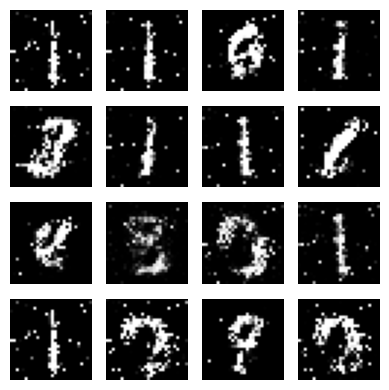

Epoch 11/50, Batch 0/938, D Loss: 0.2513, G Loss: 2.1724
Epoch 11/50, Batch 100/938, D Loss: 0.2825, G Loss: 1.4019
Epoch 11/50, Batch 200/938, D Loss: 0.1701, G Loss: 2.1939
Epoch 11/50, Batch 300/938, D Loss: 0.1783, G Loss: 2.1608
Epoch 11/50, Batch 400/938, D Loss: 0.2219, G Loss: 2.0633
Epoch 11/50, Batch 500/938, D Loss: 0.2224, G Loss: 1.9690
Epoch 11/50, Batch 600/938, D Loss: 0.2487, G Loss: 1.5554
Epoch 11/50, Batch 700/938, D Loss: 0.2319, G Loss: 1.6869
Epoch 11/50, Batch 800/938, D Loss: 0.3988, G Loss: 1.1642
Epoch 11/50, Batch 900/938, D Loss: 0.3488, G Loss: 2.6939
Epoch 12/50, Batch 0/938, D Loss: 0.3331, G Loss: 3.4275
Epoch 12/50, Batch 100/938, D Loss: 0.2144, G Loss: 2.1501
Epoch 12/50, Batch 200/938, D Loss: 0.1742, G Loss: 1.8904
Epoch 12/50, Batch 300/938, D Loss: 0.2844, G Loss: 1.7914
Epoch 12/50, Batch 400/938, D Loss: 0.2190, G Loss: 2.3026
Epoch 12/50, Batch 500/938, D Loss: 0.2565, G Loss: 2.6587
Epoch 12/50, Batch 600/938, D Loss: 0.3272, G Loss: 2.7023
E

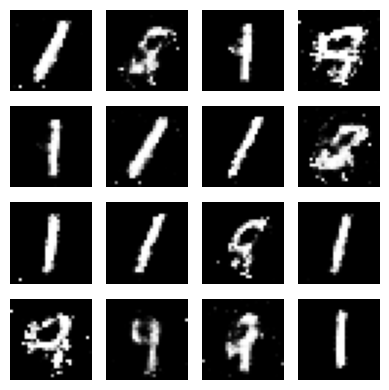

Epoch 21/50, Batch 0/938, D Loss: 0.3259, G Loss: 1.5493
Epoch 21/50, Batch 100/938, D Loss: 0.4183, G Loss: 1.3415
Epoch 21/50, Batch 200/938, D Loss: 0.3004, G Loss: 1.8465
Epoch 21/50, Batch 300/938, D Loss: 0.3142, G Loss: 1.9978
Epoch 21/50, Batch 400/938, D Loss: 0.3267, G Loss: 2.1216
Epoch 21/50, Batch 500/938, D Loss: 0.3522, G Loss: 1.5609
Epoch 21/50, Batch 600/938, D Loss: 0.3373, G Loss: 2.1293
Epoch 21/50, Batch 700/938, D Loss: 0.3255, G Loss: 2.1096
Epoch 21/50, Batch 800/938, D Loss: 0.3583, G Loss: 1.7713
Epoch 21/50, Batch 900/938, D Loss: 0.2464, G Loss: 2.2368
Epoch 22/50, Batch 0/938, D Loss: 0.3399, G Loss: 1.9867
Epoch 22/50, Batch 100/938, D Loss: 0.2525, G Loss: 1.6861
Epoch 22/50, Batch 200/938, D Loss: 0.2708, G Loss: 1.8993
Epoch 22/50, Batch 300/938, D Loss: 0.4863, G Loss: 3.4612
Epoch 22/50, Batch 400/938, D Loss: 0.2875, G Loss: 1.6737
Epoch 22/50, Batch 500/938, D Loss: 0.3801, G Loss: 1.8551
Epoch 22/50, Batch 600/938, D Loss: 0.3214, G Loss: 2.5051
E

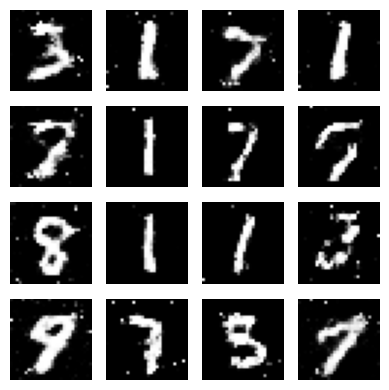

Epoch 31/50, Batch 0/938, D Loss: 0.3417, G Loss: 1.6550
Epoch 31/50, Batch 100/938, D Loss: 0.2840, G Loss: 1.6357
Epoch 31/50, Batch 200/938, D Loss: 0.3041, G Loss: 1.8075
Epoch 31/50, Batch 300/938, D Loss: 0.3711, G Loss: 1.8207
Epoch 31/50, Batch 400/938, D Loss: 0.3733, G Loss: 2.0562
Epoch 31/50, Batch 500/938, D Loss: 0.3137, G Loss: 2.2834
Epoch 31/50, Batch 600/938, D Loss: 0.2475, G Loss: 1.7056
Epoch 31/50, Batch 700/938, D Loss: 0.2998, G Loss: 2.0794
Epoch 31/50, Batch 800/938, D Loss: 0.2830, G Loss: 1.5691
Epoch 31/50, Batch 900/938, D Loss: 0.3200, G Loss: 1.5033
Epoch 32/50, Batch 0/938, D Loss: 0.3806, G Loss: 1.4541
Epoch 32/50, Batch 100/938, D Loss: 0.2752, G Loss: 2.0298
Epoch 32/50, Batch 200/938, D Loss: 0.3363, G Loss: 2.5485
Epoch 32/50, Batch 300/938, D Loss: 0.2947, G Loss: 2.0427
Epoch 32/50, Batch 400/938, D Loss: 0.3251, G Loss: 2.0550
Epoch 32/50, Batch 500/938, D Loss: 0.2980, G Loss: 1.8838
Epoch 32/50, Batch 600/938, D Loss: 0.3231, G Loss: 1.6541
E

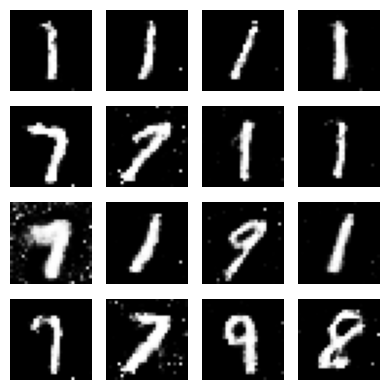

Epoch 41/50, Batch 0/938, D Loss: 0.3115, G Loss: 1.6339
Epoch 41/50, Batch 100/938, D Loss: 0.2910, G Loss: 1.7879
Epoch 41/50, Batch 200/938, D Loss: 0.2246, G Loss: 1.7919
Epoch 41/50, Batch 300/938, D Loss: 0.2453, G Loss: 2.1101
Epoch 41/50, Batch 400/938, D Loss: 0.3408, G Loss: 1.9939
Epoch 41/50, Batch 500/938, D Loss: 0.4441, G Loss: 2.3772
Epoch 41/50, Batch 600/938, D Loss: 0.2816, G Loss: 1.7605
Epoch 41/50, Batch 700/938, D Loss: 0.2775, G Loss: 1.9385
Epoch 41/50, Batch 800/938, D Loss: 0.2539, G Loss: 1.9349
Epoch 41/50, Batch 900/938, D Loss: 0.2847, G Loss: 2.0316
Epoch 42/50, Batch 0/938, D Loss: 0.2884, G Loss: 1.5992
Epoch 42/50, Batch 100/938, D Loss: 0.2800, G Loss: 1.6164
Epoch 42/50, Batch 200/938, D Loss: 0.3135, G Loss: 2.0988
Epoch 42/50, Batch 300/938, D Loss: 0.3803, G Loss: 2.0017
Epoch 42/50, Batch 400/938, D Loss: 0.3942, G Loss: 2.5306
Epoch 42/50, Batch 500/938, D Loss: 0.2911, G Loss: 1.6840
Epoch 42/50, Batch 600/938, D Loss: 0.3652, G Loss: 1.9680
E

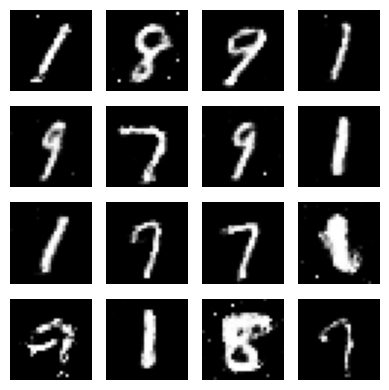

In [11]:
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(train_loader):
        batch_size = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        
        # Create labels
        valid = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)
        
        optimizer_G.zero_grad()
        
        # Generate noise
        z = torch.randn(batch_size, latent_dim).to(device)
        
        # Generate fake images
        gen_imgs = gan.generator(z)
        
        # Try to fool the discriminator
        g_loss = adversarial_loss(gan.discriminator(gen_imgs), valid)
        
        g_loss.backward()
        optimizer_G.step()
        
        optimizer_D.zero_grad()
        
        # Measure discriminator's ability to classify real images
        real_loss = adversarial_loss(gan.discriminator(real_imgs), valid)
        
        # Measure discriminator's ability to classify fake images
        fake_loss = adversarial_loss(gan.discriminator(gen_imgs.detach()), fake)
        
        d_loss = (real_loss + fake_loss) / 2
        
        d_loss.backward()
        optimizer_D.step()
        
        # Print progress
        if i % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Batch {i}/{len(train_loader)}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
    
    # Save generated samples at intervals
    if (epoch + 1) % sample_interval == 0:
        # Generate samples
        with torch.no_grad():
            gan.eval()
            samples = gan.sample(16, device)
            # Denormalize samples
            samples = (samples * 0.5) + 0.5
            
            # Plot samples
            plt.figure(figsize=(4, 4))
            for j in range(16):
                plt.subplot(4, 4, j + 1)
                plt.imshow(samples[j].cpu().squeeze().numpy(), cmap='gray')
                plt.axis('off')
            plt.tight_layout()
            plt.show()


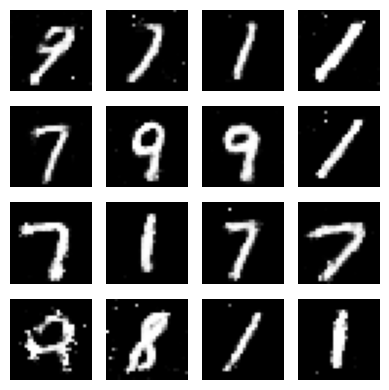

In [12]:
with torch.no_grad():
    gan.eval()
    samples = gan.sample(16, device)
    # Denormalize samples
    samples = (samples * 0.5) + 0.5
    
    # Plot samples
    plt.figure(figsize=(4, 4))
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(samples[i].cpu().squeeze().numpy(), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_final_samples.png')

# Save model
torch.save({
    'generator_state_dict': gan.generator.state_dict(),
    'discriminator_state_dict': gan.discriminator.state_dict()
}, 'gan_model.pth')

